In [1]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image



In [3]:
def extract_dominant_colors(image, num_colors):
    resized_image = cv2.resize(image, (600, 400), interpolation=cv2.INTER_AREA)
    reshaped_image = resized_image.reshape(resized_image.shape[0] * resized_image.shape[1], 3)
    
    kmeans = KMeans(n_clusters=num_colors)
    labels = kmeans.fit_predict(reshaped_image)
    center_colors = kmeans.cluster_centers_
    hex_colors = ['#%02x%02x%02x' % (int(color[0]), int(color[1]), int(color[2])) for color in center_colors]
    
    return center_colors, hex_colors

In [4]:
def display_color_pie(colors, labels):
    color_counts = np.bincount(labels)
    percentages = color_counts / np.sum(color_counts)
    sorted_indices = np.argsort(color_counts)[::-1]
    sorted_colors = [colors[i] for i in sorted_indices]
    sorted_percentages = [percentages[i] for i in sorted_indices]
    
    plt.figure(figsize=(8, 6))
    plt.pie(sorted_percentages, labels=sorted_colors, colors=sorted_colors)
    plt.show()


In [5]:
def match_image_by_color(image, color, threshold=60):
    lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    lab_color = cv2.cvtColor(np.uint8([[color]]), cv2.COLOR_RGB2LAB)[0][0]
    
    diff = np.sqrt(np.sum((lab_image - lab_color) ** 2, axis=2))
    matching_pixels = np.sum(diff < threshold)
    
    return matching_pixels > 0

In [6]:
def show_selected_images(images, color, threshold, num_colors):
    selected_images = []
    
    for image in images:
        if match_image_by_color(image, color, threshold):
            selected_images.append(image)
    
    num_selected = len(selected_images)
    if num_selected == 0:
        print("No matching images found.")
    else:
        fig, axes = plt.subplots(1, num_selected, figsize=(4 * num_selected, 4))
        
        for i, image in enumerate(selected_images):
            axes[i].imshow(image)
            axes[i].axis('off')
        
        plt.show()

In [7]:
# Load images from the directory
IMAGE_DIRECTORY = 'images'
image_files = [file for file in os.listdir(IMAGE_DIRECTORY) if not file.startswith('.')]
images = [get_image(os.path.join(IMAGE_DIRECTORY, file)) for file in image_files]

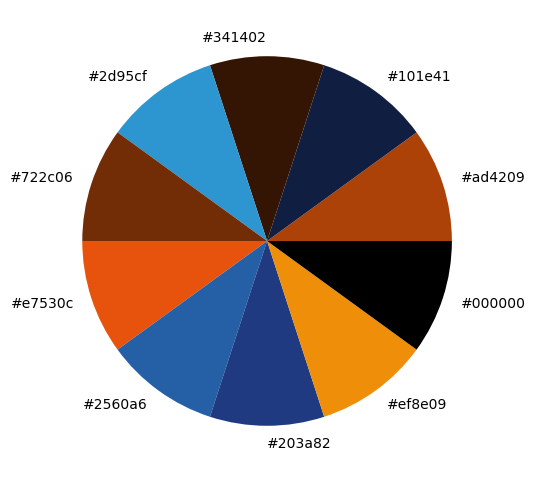

In [8]:
# Extract dominant colors and display color chart
num_colors = 10
dominant_colors, hex_colors = extract_dominant_colors(images[0], num_colors)
display_color_pie(hex_colors, range(num_colors))